In [7]:
!pip install statsmodels

In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib as plt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
from sklearn.linear_model import LogisticRegression
from google.colab import drive
#mounting my google driving to access data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /HLM_Data_For_DFW_With_LA_Count.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Second Year Project/Student Data /HLM_Data_For_SYG.csv')


In [10]:
df = df[df['Course Title'] != 'Calculus A']

df2 = df2[df2['Course Title'] != 'Calculus A']

In [11]:
df['LA Count'].value_counts()

LA Count
0    9025
1    1166
2     340
3     109
4      22
5       8
6       4
7       1
Name: count, dtype: int64

In [12]:
# Concatenate 'Term' and 'class_section' into a single column
df['group'] = df['Term'].astype(str) + df['subject'].astype(str) + df['class_section'].astype(str)
#df2['group'] = df2['catalog_nbr'].astype(str)



# Create the MixedLM model using the new 'group' column as a grouping variable
model1 = smf.mixedlm("Q('DFW dummy') ~ LA + Q('First Gen dummy') + Q('gender dummy') + Q('AALANA dummy')", df, groups=df['group']).fit()

# Print the summary
print(model1.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Q('DFW dummy')
No. Observations:  10675    Method:              REML          
No. Groups:        220      Scale:               0.1649        
Min. group size:   5        Log-Likelihood:      inf           
Max. group size:   85       Converged:           Yes           
Mean group size:   48.5                                        
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.000                                    
LA                   -0.098    0.015 -6.725 0.000 -0.126 -0.069
Q('First Gen dummy')  0.004    0.011  0.416 0.677 -0.016  0.025
Q('gender dummy')     0.001    0.010  0.111 0.912 -0.018  0.021
Q('AALANA dummy')     0.101    0.013  7.738 0.000  0.076  0.127
Group Var             0.000                          

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


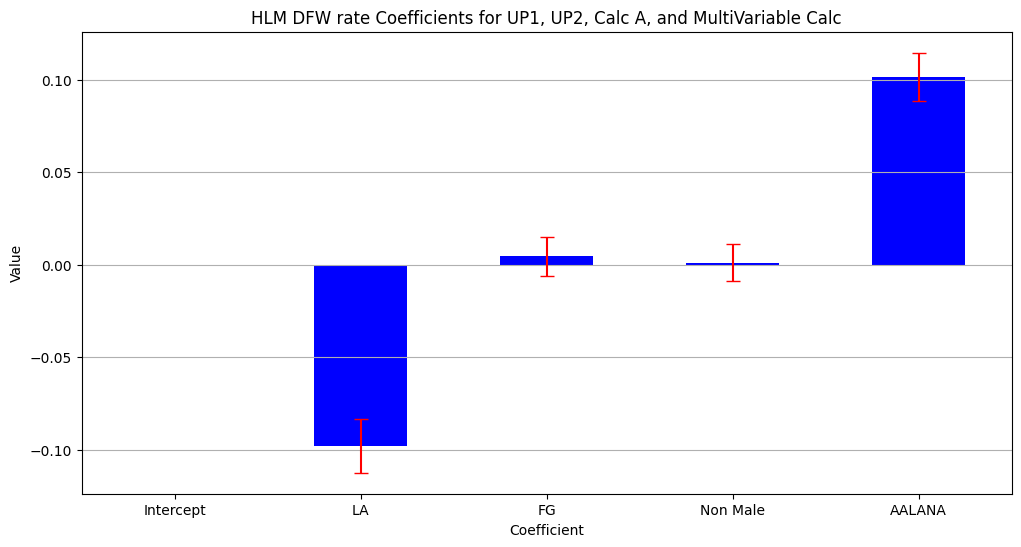

In [13]:
# Extract the coefficients and standard errors
coefficients = model1.params[:-1]
std_errors = model1.bse[:-1]

# Define new tick labels
new_tick_labels = coefficients.index.tolist()
new_tick_labels[2] = 'FG'
new_tick_labels[3] = 'Non Male'
new_tick_labels[4] = 'AALANA'

# Plot the coefficients on a bar plot
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar', color='blue', yerr=std_errors, capsize=5, ecolor='red')
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.title('HLM DFW rate Coefficients for UP1, UP2, Calc A, and MultiVariable Calc')
plt.xticks(range(len(new_tick_labels)), new_tick_labels, rotation=0, ha='center')
plt.grid(axis='y')
plt.show()

In [14]:
# Concatenate 'Term' and 'class_section' into a single column
df2['group'] = df2['Term'].astype(str) + df2['class_section'].astype(str)
#df2['group'] = df2['catalog_nbr'].astype(str)



# Create the MixedLM model using the new 'group' column as a grouping variable
model2 = smf.mixedlm("Q('DFW dummy') ~ LA + Q('First Gen dummy') + Q('gender dummy') + Q('AALANA dummy')", df2, groups=df2['group']).fit()

# Print the summary
print(model2.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Q('DFW dummy')
No. Observations:  5691     Method:              REML          
No. Groups:        170      Scale:               0.1682        
Min. group size:   1        Log-Likelihood:      -3084.4824    
Max. group size:   105      Converged:           Yes           
Mean group size:   33.5                                        
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.247    0.011 21.838 0.000  0.225  0.270
LA                   -0.072    0.013 -5.438 0.000 -0.098 -0.046
Q('First Gen dummy')  0.023    0.014  1.667 0.096 -0.004  0.049
Q('gender dummy')    -0.008    0.013 -0.629 0.529 -0.035  0.018
Q('AALANA dummy')     0.117    0.019  6.289 0.000  0.081  0.154
Group Var             0.007    0.004                 

In [15]:
# Concatenate 'Term' and 'class_section' into a single column
df['group'] = df['Course Title']
#df2['group'] = df2['catalog_nbr'].astype(str)



# Create the MixedLM model using the new 'group' column as a grouping variable
modela = smf.mixedlm("Q('DFW dummy') ~ LA + Q('First Gen dummy') + Q('gender dummy') + Q('AALANA dummy')", df, groups=df['group']).fit()

# Print the summary
print(modela.summary())


             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Q('DFW dummy')
No. Observations:  10675    Method:              REML          
No. Groups:        3        Scale:               0.1727        
Min. group size:   1732     Log-Likelihood:      -5793.0680    
Max. group size:   4966     Converged:           Yes           
Mean group size:   3558.3                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.244    0.040  6.048 0.000  0.165  0.323
LA                   -0.059    0.009 -6.871 0.000 -0.076 -0.042
Q('First Gen dummy') -0.002    0.011 -0.198 0.843 -0.023  0.019
Q('gender dummy')    -0.001    0.010 -0.144 0.886 -0.021  0.018
Q('AALANA dummy')     0.098    0.013  7.432 0.000  0.072  0.124
Group Var             0.005    0.012                 

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [16]:


# Define a function to fit MixedLM model for each group and extract coefficients and standard errors
def fit_mixedlm_for_group(group_df):
    model = sm.MixedLM.from_formula("Q('DFW dummy') ~ LA + Q('LA Count') + Q('First Gen dummy') + Q('gender dummy') + Q('AALANA dummy')",
                                    groups='group',
                                    data=group_df).fit()
    params = model.params
    std_errs = model.bse
    # Creating a DataFrame to hold coefficients and standard errors
    result_df = pd.DataFrame({'Coefficient': params, 'Std Error': std_errs})
    return result_df

# Group by 'group' and fit MixedLM for each group
group_coefficients = df.groupby('group').apply(fit_mixedlm_for_group)


# Print coefficients and standard errors for each group
print(group_coefficients)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                                                 Coefficient     Std Error
group                                                                     
Elements Multivar Calculus Intercept                0.337850  4.186743e-01
                           LA                      -0.121827  2.167137e-02
                           Q('LA Count')           -0.004461  1.264433e-02
                           Q('First Gen dummy')    -0.060303  2.451058e-02
                           Q('gender dummy')       -0.069030  2.937414e-02
                           Q('AALANA dummy')        0.009608  2.686532e-02
                           group Var                1.000000  1.843622e+07
University Physics I       Intercept                0.163054  3.571114e-01
                           LA                      -0.036226  1.147646e-02
                           Q('LA Count')           -0.012845  1.167792e-02
                           Q('First Gen dummy')     0.011124  1.460831e-02
                         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


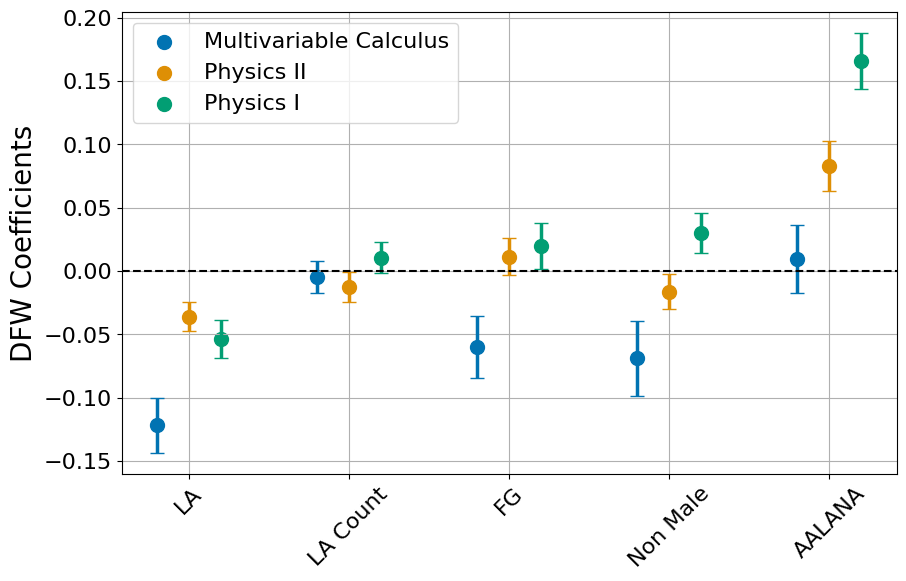

In [17]:


# Group by 'group' and fit MixedLM for each group
group_coefficients = df.groupby('group').apply(fit_mixedlm_for_group)

# Removing intercepts and group variance
group_coefficients = group_coefficients.drop(index=['Intercept'], level=1, errors='ignore')
group_coefficients = group_coefficients.drop(index=['group Var'], level=1, errors='ignore')

# Extracting the coefficients and standard errors into a DataFrame for plotting
coefficients = group_coefficients['Coefficient'].reset_index().pivot(index='level_1', columns='group', values='Coefficient')
std_errors = group_coefficients['Std Error'].reset_index().pivot(index='level_1', columns='group', values='Std Error')

# Reorder rows so 'LA Count' is second
coefficients = coefficients.reindex(["LA", "Q('LA Count')", "Q('First Gen dummy')", "Q('gender dummy')", "Q('AALANA dummy')"])
std_errors = std_errors.reindex(["LA", "Q('LA Count')", "Q('First Gen dummy')", "Q('gender dummy')", "Q('AALANA dummy')"])

# Ensure x-axis labels are categorical
coefficients.index = pd.Categorical(coefficients.index)

# Plotting
plt.figure(figsize=(10, 6))
unique_groups = coefficients.columns
colors = sns.color_palette('colorblind', n_colors=len(unique_groups))
offset = np.linspace(-0.2, 0.2, len(unique_groups))  # Create offsets for side-by-side plotting

for i, group in enumerate(coefficients.columns):
    x_values = np.arange(len(coefficients.index)) + offset[i]
    y_values = coefficients[group]
    std_err = std_errors[group]
    plt.scatter(x_values, y_values, color=colors[i], label=f'Group {group}', s=100)
    plt.errorbar(x_values, y_values, yerr=std_err, fmt='o', color=colors[i], capsize=5, elinewidth=2.5)

# Customize x-axis labels
custom_labels = ["LA", "LA Count", "FG", "Non Male", "AALANA"] # Use the index of coefficients as labels
plt.xticks(ticks=np.arange(len(coefficients.index)), labels=custom_labels, rotation=45, fontsize=16)  # Larger x-axis labels
plt.yticks(fontsize=16)

# plt.title('DFW HLM Model', fontsize=24)  # Larger title
plt.ylabel('DFW Coefficients', fontsize=20)  # Larger y-axis label
plt.xlabel('', fontsize=14)  # Larger x-axis label

# Customizing legend
legend_labels = ['Multivariable Calculus', 'Physics II', 'Physics I']  # Replace with your custom names
plt.legend(title='', labels=legend_labels, fontsize=16)


# Adding horizontal line at zero
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(True)  # Adding grid lines
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


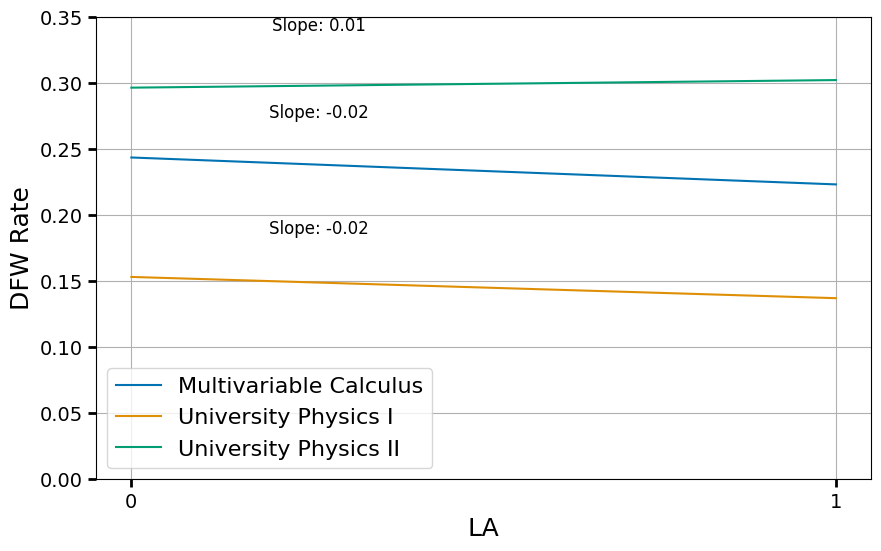

In [18]:

# Set colorblind-friendly palette from seaborn
colors = sns.color_palette("colorblind")


# Assuming df is your DataFrame with the necessary data
def HLM(group_df):
    # Define and fit the mixed model for each group
    md = sm.MixedLM.from_formula("Q('DFW dummy') ~ Q('LA Count')", group_df, groups=group_df["Course Title"]).fit()
    return pd.Series(md.params)

# Group by 'Course Title' and fit MixedLM for each group
group_coefficients = df.groupby('Course Title').apply(HLM)

# Define a range for LA
LA_range = np.linspace(0, 1, 100)

# Plot linear curves for each course
plt.figure(figsize=(10, 6))

for i, course in enumerate(group_coefficients.index):
    intercept = group_coefficients.loc[course, "Intercept"]
    slope = group_coefficients.loc[course, "Q('LA Count')"]
    plt.plot(LA_range, intercept + slope * LA_range, label=course, color=colors[i % len(colors)])

    # Annotate the slope more to the left and above each curve
    annotation_x = LA_range[int(len(LA_range) / 2)] - 0.2  # Adjust this value to move the annotation more to the left
    annotation_y = intercept + slope * LA_range[int(len(LA_range) / 2)] + 0.03  # Adjust this value to fine-tune vertical positioning
    plt.annotate(f"Slope: {slope:.2f}", xy=(annotation_x, annotation_y),
                 xytext=(-20, 10), textcoords='offset points', fontsize=12, color='black', ha='center')


plt.xlabel("LA",fontsize=18)
plt.ylabel('DFW Rate',fontsize=18)
#plt.title("Linear Regression Lines for Each Course")
# Customizing legend
legend_labels = ['Multivariable Calculus', 'Physics II', 'Physics I']  # Replace with your custom names
plt.legend(title='', labels=legend_labels, fontsize=16)
plt.grid(True)


# Set the y-axis range
plt.ylim(0, 0.35)


# Set x-axis tick locations and labels
plt.xticks([0, 1], ['0', '1'])


# Make x and y-axis tick marks larger
plt.tick_params(axis='x', which='both', direction='out', labelsize=14, length=6, width=2)
plt.tick_params(axis='y', which='both', direction='out', labelsize=14, length=6, width=2)

plt.show()


In [19]:
df2['group'] = df2['Course Title']


# Define a function to fit MixedLM model for each group and extract coefficients and standard errors
def fit_mixedlm_for_group(group_df):
    model = sm.MixedLM.from_formula("Q('SYG') ~ LA + Q('First Gen dummy') + Q('gender dummy') + Q('AALANA dummy')",
                                    groups='group',
                                    data=group_df).fit()
    params = model.params
    std_errs = model.bse
    # Creating a DataFrame to hold coefficients and standard errors
    result_df = pd.DataFrame({'Coefficient': params, 'Std Error': std_errs})
    return result_df

# Group by 'group' and fit MixedLM for each group
group_coefficients = df2.groupby('group').apply(fit_mixedlm_for_group)

# Print coefficients and standard errors for each group
print(group_coefficients)

                                                 Coefficient     Std Error
group                                                                     
Elements Multivar Calculus Intercept                0.789906  3.869148e-01
                           LA                       0.043365  4.123315e-02
                           Q('First Gen dummy')     0.007581  2.980832e-02
                           Q('gender dummy')        0.007054  3.881680e-02
                           Q('AALANA dummy')       -0.060614  3.499055e-02
                           group Var                1.000000  1.592871e+07
University Physics I       Intercept                0.786319  3.935874e-01
                           LA                       0.003505  1.764006e-02
                           Q('First Gen dummy')    -0.019387  2.155577e-02
                           Q('gender dummy')        0.102973  2.058198e-02
                           Q('AALANA dummy')       -0.023900  3.226153e-02
                         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


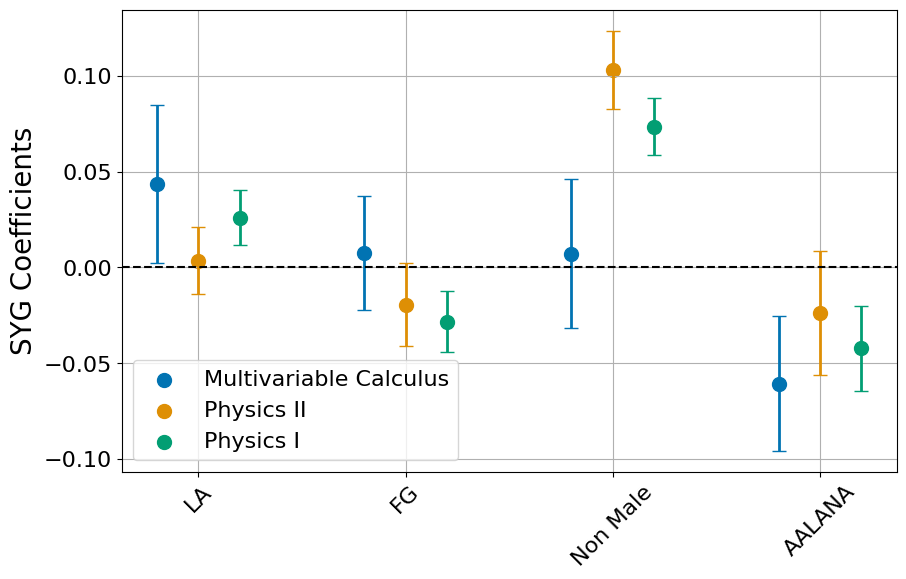

In [24]:
# Group by 'group' and fit MixedLM for each group
group_coefficients = df2.groupby('group').apply(fit_mixedlm_for_group)

# Removing intercepts and group variance
group_coefficients = group_coefficients.drop(index=['Intercept'], level=1, errors='ignore')
group_coefficients = group_coefficients.drop(index=['group Var'], level=1, errors='ignore')

# Extracting the coefficients and standard errors into a DataFrame for plotting
coefficients = group_coefficients['Coefficient'].reset_index().pivot(index='level_1', columns='group', values='Coefficient')
std_errors = group_coefficients['Std Error'].reset_index().pivot(index='level_1', columns='group', values='Std Error')

# Reorder rows excluding 'SYG LA Count'
coefficients = coefficients.reindex(["LA", "Q('First Gen dummy')", "Q('gender dummy')", "Q('AALANA dummy')"])
std_errors = std_errors.reindex(["LA", "Q('First Gen dummy')", "Q('gender dummy')", "Q('AALANA dummy')"])

# Ensure x-axis labels are categorical
coefficients.index = pd.Categorical(coefficients.index)

# Plotting
plt.figure(figsize=(10, 6))
unique_groups = coefficients.columns
colors = sns.color_palette('colorblind', n_colors=len(unique_groups))  # Colorblind-friendly palette
offset = np.linspace(-0.2, 0.2, len(unique_groups))  # Create offsets for side-by-side plotting

for i, group in enumerate(coefficients.columns):
    x_values = np.arange(len(coefficients.index)) + offset[i]
    y_values = coefficients[group]
    std_err = std_errors[group]
    plt.scatter(x_values, y_values, color=colors[i], label=f'Group {group}', s=100)
    plt.errorbar(x_values, y_values, yerr=std_err, fmt='o', color=colors[i], capsize=5, elinewidth=2)

# Customize x-axis labels
custom_labels = ["LA", "FG", "Non Male", "AALANA"]  # Adjusted labels without 'SYG LA Count'
plt.xticks(ticks=np.arange(len(coefficients.index)), labels=custom_labels, rotation=45, fontsize=16)

#plt.title('SYG HLM Model', fontsize=24)  # Title for SYG instead of DFW
plt.ylabel('SYG Coefficients', fontsize=20)  # Adjusted y-axis label
plt.xlabel('', fontsize=14)

# Customizing legend
legend_labels = ['Multivariable Calculus', 'Physics II', 'Physics I']  # Replace with your custom names
plt.legend(title='', labels=legend_labels, fontsize=16)

# Adding horizontal line at zero
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(True)  # Adding grid lines

# Increase y-axis tick parameters
plt.yticks(fontsize=16)  # Adjust the fontsize parameter to increase the size of y-axis tick labels

plt.show()

In [21]:


# Define a function to fit MixedLM model for each group and extract coefficients and standard errors
def fit_mixedlm_for_group2(group_df):
    model = sm.MixedLM.from_formula("Q('SYG') ~ LA  + Q('First Gen dummy') + Q('gender dummy') + Q('AALANA dummy')",
                                    groups='group',
                                    data=group_df).fit()
    params = model.params
    std_errs = model.bse
    # Creating a DataFrame to hold coefficients and standard errors
    result_df = pd.DataFrame({'Coefficient': params, 'Std Error': std_errs})
    return result_df

# Group by 'group' and fit MixedLM for each group
group_coefficients = df2.groupby('group').apply(fit_mixedlm_for_group)


# Print coefficients and standard errors for each group
print(group_coefficients)


                                                 Coefficient     Std Error
group                                                                     
Elements Multivar Calculus Intercept                0.789906  3.869148e-01
                           LA                       0.043365  4.123315e-02
                           Q('First Gen dummy')     0.007581  2.980832e-02
                           Q('gender dummy')        0.007054  3.881680e-02
                           Q('AALANA dummy')       -0.060614  3.499055e-02
                           group Var                1.000000  1.592871e+07
University Physics I       Intercept                0.786319  3.935874e-01
                           LA                       0.003505  1.764006e-02
                           Q('First Gen dummy')    -0.019387  2.155577e-02
                           Q('gender dummy')        0.102973  2.058198e-02
                           Q('AALANA dummy')       -0.023900  3.226153e-02
                         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


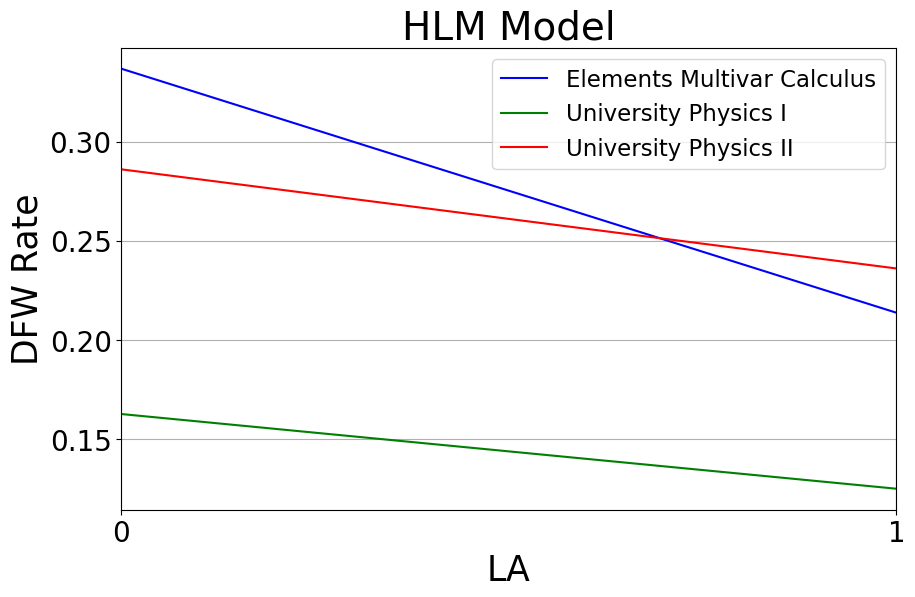

In [22]:
# Provided data
data = {
    'Elements Multivar Calculus': {
        'Intercept': 0.336813,
        'LA': -0.123097
    },
    'University Physics I': {
        'Intercept': 0.162599,
        'LA': -0.037677
    },
    'University Physics II': {
        'Intercept': 0.286049,
        'LA': -0.049999
    }
}

# Define colors for each group
colors = ['blue', 'green', 'red']

# Generate some sample data for plotting purposes
x_values = np.linspace(0, 1, 100)  # Adjusted to range from 0 to 1

# Plot the linear curves for each group
plt.figure(figsize=(10, 6))
for i, (group, group_data) in enumerate(data.items()):
    intercept = group_data['Intercept']
    LA_coef = group_data['LA']
    predicted_values = intercept + LA_coef * x_values
    plt.plot(x_values, predicted_values, label=group, color=colors[i])

plt.xlabel('LA', fontsize=25)
plt.ylabel('DFW Rate', fontsize=25)
plt.title('HLM Model', fontsize=28)
plt.legend(title='', fontsize=16.5)

# Set the x-axis limits and ticks to 0 and 1
plt.xlim(0, 1)
plt.xticks(np.linspace(0, 1, 2), fontsize=20)

# Set the y-ticks to larger size
plt.yticks(fontsize=20)

plt.grid(True)
plt.show()



NameError: name 'feature_names' is not defined

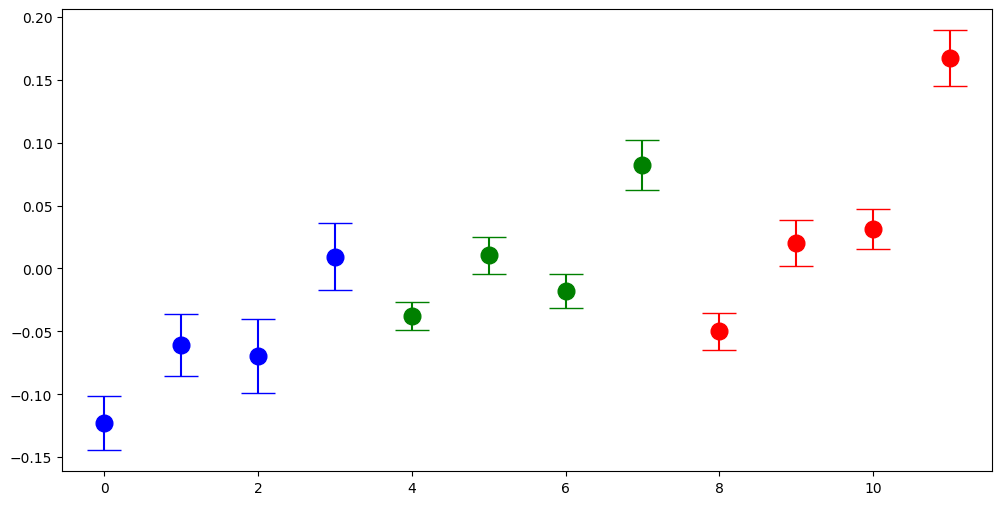

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
data = {
    'Elements Multivar Calculus': {
        'LA': (-0.123097, 2.136481e-02),
        'First Gen dummy': (-0.060801, 2.446363e-02),
        'gender dummy': (-0.069299, 2.935680e-02),
        'AALANA dummy': (0.009466, 2.685550e-02)
    },
    'University Physics I': {
        'LA': (-0.037677, 1.140074e-02),
        'First Gen dummy': (0.010341, 1.459131e-02),
        'gender dummy': (-0.018109, 1.363723e-02),
        'AALANA dummy': (0.081892, 1.979008e-02)
    },
    'University Physics II': {
        'LA': (-0.049999, 1.455249e-02),
        'First Gen dummy': (0.020083, 1.807499e-02),
        'gender dummy': (0.031620, 1.579450e-02),
        'AALANA dummy': (0.166924, 2.228147e-02)
    }
}

# Define colors for each group
colors = ['blue', 'green', 'red']

# Define coefficient types and group names
coef_types = list(data['Elements Multivar Calculus'].keys())
group_names = list(data.keys())

# Create an array to hold the x-values for each dot
x_values = np.arange(len(coef_types))

# Plot each group's coefficients separately and create a legend
plt.figure(figsize=(12, 6))
for i, group_name in enumerate(group_names):
    # Calculate the x-offsets for the dots of each group
    x_offsets = x_values + i * len(coef_types)

    # Extract coefficients and standard errors for the current group
    coefs = [data[group_name][coef][0] for coef in coef_types]
    std_errs = [data[group_name][coef][1] for coef in coef_types]

    # Plot coefficients for the current group as dots with error bars
    plt.errorbar(x_offsets, coefs, yerr=std_errs, fmt='o', color=colors[i], label=group_name, capsize=12, markersize=12)

# Set x-ticks to the custom feature names
plt.xticks(np.arange(len(group_names) * len(coef_types)), feature_names, rotation=45, ha='right', fontsize=22)

# Make y-axis tick labels larger
plt.yticks(fontsize=20)

# Add labels and title
plt.ylabel('DFW Coefficients', fontsize=25)
plt.title('DFW HLM Model', fontsize=25)

# Create legend
plt.legend(loc='upper left', fontsize=22)

# Show grid
plt.grid(True)

plt.tight_layout()
plt.show()

